# Linear regression


```{note}
This chapter is adapted from Danielle Navarro's excellent [Learning Statistics with R](https://learningstatisticswithr.com) book.  Some new sections were added about the interpretation of the coefficients in multiple regression, and the meaning and concern about colinearity.  In addition some person references were replaced to make more sense from the students in my class. Otherwise the text of Danielle's version has mainly be left intact with a few modifications, except the code throughout adapted to use python and jupyter. 
```

The goal in this chapter is to introduce **_linear regression_**, the standard tool that statisticians rely on when analysing the relationship between interval scale predictors and interval scale outcomes. Stripped to its bare essentials, linear regression models are basically a slightly fancier version of the Pearson correlation you learned about in the previous chapter though as we'll see, regression models are much more powerful tools. 

In [24]:
from IPython.core.display import HTML, Markdown, display

import numpy.random as npr
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings("ignore")

from myst_nb import glue # for the Jupyter book chapter

## What is a linear regression model?

To kick things off we were trying to find out why Dan (also Todd) is so very grumpy all the time, and our working hypothesis was that I'm not getting enough sleep. We drew some scatterplots to help us examine the relationship between the amount of sleep I get, and my grumpiness the following day. The actual scatterplot that we draw is the one shown in  {numref}`fig:scatter`, and as we saw previously this corresponds to a correlation of $r=-.90$, but what we find ourselves secretly imagining is something that looks closer to {numref}`fig:regplot`. That is, we mentally draw a straight line through the middle of the data. In statistics, this line that we're drawing is called a **_regression line_**. Notice that -- since we're not idiots -- the regression line goes through the middle of the data. We don't find ourselves imagining anything like the rather silly plot shown in {numref}`fig:regplot2`. 

In [2]:
parenthood_df = pd.read_csv('http://gureckislab.org/courses/fall19/labincp/data/parenthood.csv', sep = ',', header='infer')
parenthood_df.columns=['sleep','babysleep','grump','day']

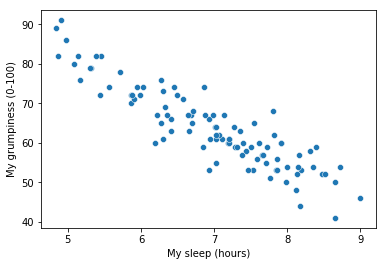

In [22]:
fig=sns.scatterplot(x='sleep',y='grump',data=parenthood_df)
plt.xlabel("My sleep (hours)")
plt.ylabel("My grumpiness (0-100)")
fig=plt.gcf()
glue("scatter_fig",fig,display=False)

```{glue:figure} scatter_fig
:figwidth: 550px
:name: "fig:scatter"

Scatterplot showing grumpiness as a function of hours slept.
```

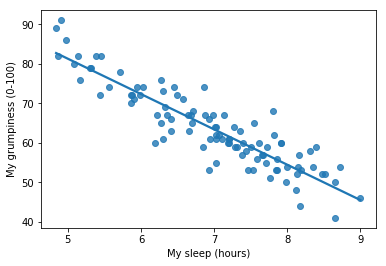

In [18]:
sns.regplot(x='sleep',y='grump',ci=None, data=parenthood_df)
plt.xlabel("My sleep (hours)")
plt.ylabel("My grumpiness (0-100)")
#plt.show()
fig=plt.gcf()
glue("regplot_fig",fig,display=False)

```{glue:figure} regplot_fig
:figwidth: 550px
:name: "fig:regplot"

The sleep-grumpiness scatterplot from above with the best fitting regression line drawn over the top. Not surprisingly, the line goes through the middle of the data.
```

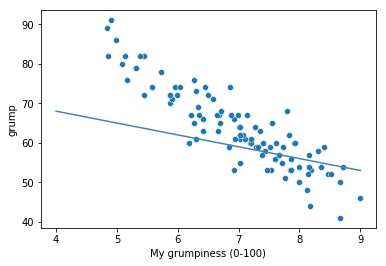

In [19]:
sns.scatterplot(x='sleep',y='grump',ci=None, data=parenthood_df)
plt.xlabel("My sleep (hours)")
plt.xlabel("My grumpiness (0-100)")
x=np.linspace(4,9,200)
y=80-3*x
plt.plot(x,y,'-',color='steelblue')
fig=plt.gcf()
glue("regplot2_fig",fig,display=False)

```{glue:figure} regplot2_fig
:figwidth: 550px
:name: "fig:regplot2"

In contrast, this plot shows the same data, but with a very poor choice of regression line drawn over the top.
```



This is not highly surprising: the line that I've drawn in {numref}`fig:regplot2` doesn't "fit" the data very well, so it doesn't make a lot of sense to propose it as a way of summarising the data, right? This is a very simple observation to make, but it turns out to be very powerful when we start trying to wrap just a little bit of maths around it. To do so, let's start with a refresher of some high school maths. The formula for a straight line is usually written like this:
$
y = mx + c
$ 
Or, at least, that's what it was when I went to high school all those years ago. The two *variables* are $x$ and $y$, and we have two *coefficients*, $m$ and $c$. The coefficient $m$ represents the *slope* of the line, and the coefficient $c$ represents the *$y$-intercept* of the line. Digging further back into our decaying memories of high school (sorry, for some of us high school was a long time ago), we remember that the intercept is interpreted as "the value of $y$ that you get when $x=0$". Similarly, a slope of $m$ means that if you increase the $x$-value by 1 unit, then the $y$-value goes up by $m$ units; a negative slope means that the $y$-value would go down rather than up. Ah yes, it's all coming back to me now. 

Now that we've remembered that, it should come as no surprise to discover that we use the exact same formula to describe a regression line. If $Y$ is the outcome variable (the DV) and $X$ is the predictor variable (the IV), then the formula that describes our regression is written like this:
$
\hat{Y_i} = b_1 X_i + b_0
$
Hm. Looks like the same formula, but there's some extra frilly bits in this version. Let's make sure we understand them. Firstly, notice that I've written $X_i$ and $Y_i$ rather than just plain old $X$ and $Y$. This is because we want to remember that we're dealing with actual data. In this equation, $X_i$ is the value of predictor variable for the $i$th observation (i.e., the number of hours of sleep that I got on day $i$ of my little study), and $Y_i$ is the corresponding value of the outcome variable (i.e., my grumpiness on that day). And although I haven't said so explicitly in the equation, what we're assuming is that this formula works for all observations in the data set (i.e., for all $i$). Secondly, notice that I wrote $\hat{Y}_i$ and not $Y_i$. This is because we want to make the distinction between the *actual data* $Y_i$, and the *estimate* $\hat{Y}_i$ (i.e., the prediction that our regression line is making). Thirdly, I changed the letters used to describe the coefficients from $m$ and $c$ to $b_1$ and $b_0$. That's just the way that statisticians like to refer to the coefficients in a regression model. I've no idea why they chose $b$, but that's what they did. In any case $b_0$ always refers to the intercept term, and $b_1$ refers to the slope.

Excellent, excellent. Next, I can't help but notice that -- regardless of whether we're talking about the good regression line or the bad one -- the data don't fall perfectly on the line. Or, to say it another way, the data $Y_i$ are not identical to the predictions of the regression model $\hat{Y_i}$. Since statisticians love to attach letters, names and numbers to everything, let's refer to the difference between the model prediction and that actual data point as a *residual*, and we'll refer to it as $\epsilon_i$.  Written using mathematics, the residuals are defined as:
$
\epsilon_i = Y_i - \hat{Y}_i
$
which in turn means that we can write down the complete linear regression model as:
$
Y_i = b_1 X_i + b_0 + \epsilon_i
$

The $\epsilon$ symbol is the Greek letter epsilon. It's traditional to use $\epsilon_i$ or $e_i$ to denote a residual.

## Estimating the linear regression model

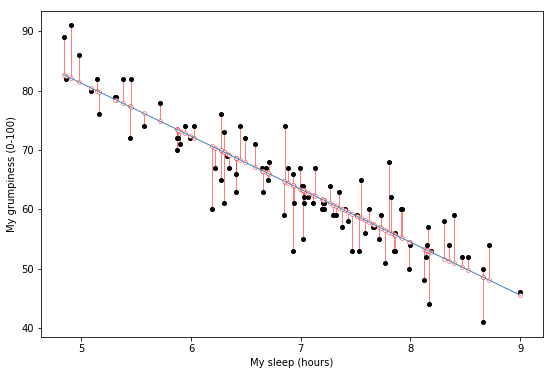

In [25]:
import statsmodels.formula.api as smf
import seaborn as sns

# fit a linear regression to the mpg column given hp
lr = smf.ols(formula="grump ~ sleep", data=parenthood_df)
fit = lr.fit() # fit
params, pred, resid = fit.params, fit.fittedvalues, fit.resid
#display(fit.summary())

fig, ax = plt.subplots(figsize=(9,6))

x1 = np.linspace(parenthood_df.sleep.min(), parenthood_df.sleep.max(),400)
y1 = params['sleep']*x1+params['Intercept']

ax.plot(parenthood_df.sleep, parenthood_df.grump,'ko',markersize=4)
ax.plot(parenthood_df.sleep, parenthood_df.grump-resid,'o',markersize=4,markeredgecolor='r', markeredgewidth=.4, markerfacecolor='white')

ax.plot(x1,y1,'-',color='steelblue',linewidth=1)

ax.vlines(parenthood_df.sleep, parenthood_df.grump, parenthood_df.grump-resid,'r',linewidth=0.5)

plt.xlabel("My sleep (hours)")
plt.ylabel("My grumpiness (0-100)")

glue("resid_fig",fig,display=False)

```{glue:figure} resid_fig
:figwidth: 550px
:name: "fig:resid"

A depiction of the residuals associated with the best fitting regression line.
```

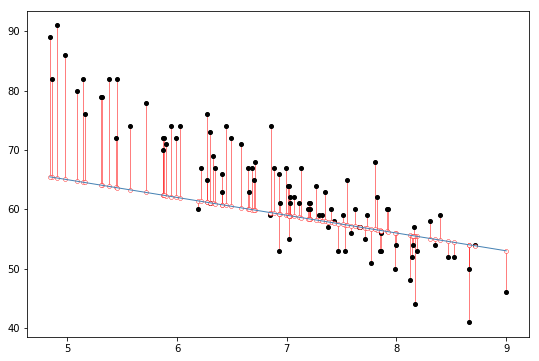

In [27]:
import statsmodels.formula.api as smf
import seaborn as sns

# fit a linear regression to the mpg column given hp
#display(fit.summary())

predict = 80-3*parenthood_df.sleep
resid = parenthood_df.grump-predict
fig, ax = plt.subplots(figsize=(9,6))

x1 = np.linspace(parenthood_df.sleep.min(), parenthood_df.sleep.max(),400)
y1 = -3*x1+80

ax.plot(parenthood_df.sleep, parenthood_df.grump,'ko',markersize=4)
ax.plot(parenthood_df.sleep, parenthood_df.grump-resid,'o',markersize=4,markeredgecolor='r', markeredgewidth=.4, markerfacecolor='white')

ax.plot(x1,y1,'-',color='steelblue',linewidth=1)

ax.vlines(parenthood_df.sleep, parenthood_df.grump, parenthood_df.grump-resid,'r',linewidth=0.5)
glue("resid2_fig",fig,display=False)

```{glue:figure} resid2_fig
:figwidth: 550px
:name: "fig:resid2"

The residuals associated with a poor regression line.
```

Okay, now let's redraw our pictures, but this time I'll add some lines to show the size of the residual for all observations. When the regression line is good, our residuals (the lengths of the solid black lines) all look pretty small, as shown in {numref}`fig:resid`, but when the regression line is a bad one, the residuals are a lot larger, as you can see from looking at {numref}`fig:resid2`. Hm. Maybe what we "want" in a regression model is *small* residuals. Yes, that does seem to make sense. In fact, I think I'll go so far as to say that the "best fitting" regression line is the one that has the smallest residuals. Or, better yet, since statisticians seem to like to take squares of everything why not say that ...

> The estimated regression coefficients, $\hat{b}_0$ and $\hat{b}_1$ are those that minimise the sum of the squared residuals, which we could either write as $\sum_i (Y_i - \hat{Y}_i)^2$ or as $\sum_i {\epsilon_i}^2$.

Yes, yes that sounds even better. And since I've indented it like that, it probably means that this is the right answer. And since this is the right answer, it's probably worth making a note of the fact that our regression coefficients are *estimates* (we're trying to guess the parameters that describe a population!), which is why I've added the little hats, so that we get $\hat{b}_0$ and $\hat{b}_1$ rather than $b_0$ and $b_1$. Finally, I should also note that -- since there's actually more than one way to estimate a regression model -- the more technical name for this estimation process is **_ordinary least squares (OLS) regression_**.  


[^linalg]: Or at least, I'm assuming that it doesn't help most people. But on the off chance that someone reading this is a proper kung fu master of linear algebra (and to be fair, I always have a few of these people in my intro stats class), it *will* help *you* to know that the solution to the estimation problem turns out to be $\hat{b} = (X^TX)^{-1} X^T y$, where $\hat{b}$ is a vector containing the estimated regression coefficients,  $X$ is the "design matrix" that contains the predictor variables (plus an additional column containing all ones; strictly $X$ is a matrix of the regressors, but I haven't discussed the distinction yet), and $y$ is a vector containing the outcome variable. For everyone else, this isn't exactly helpful, and can be downright scary. However, since quite a few things in linear regression can be written in linear algebra terms, you'll see a bunch of footnotes like this one in this chapter. If you can follow the maths in them, great. If not, ignore it.

At this point, we now have a concrete definition for what counts as our "best" choice of regression coefficients, $\hat{b}_0$ and $\hat{b}_1$. The natural question to ask next is,  if our optimal regression coefficients are those that minimise the sum squared residuals, how do we *find* these wonderful numbers? The actual answer to this question is complicated, and it doesn't help you understand the logic of regression.[^linalg] As a result, this time I'm going to let you off the hook. Instead of showing you how to do it the long and tedious way first, and then "revealing" the wonderful shortcut that python provides you with, let's cut straight to the chase... and use the [statsmodels](https://www.statsmodels.org/stable/index.html) `ols()` function (short for "ordinary least squares") to do all the heavy lifting. 

In [28]:
import statsmodels.formula.api as smf
lr=smf.ols(formula="grump ~ sleep", data=parenthood_df).fit()

### Using the `statsmodels ols()` function

There are a number of libraries that will perform linear regression in python.  These range from complex machine learning libraries (e.g., [scikit-learn](https://scikit-learn.org/stable/)) to simple statistics libraries (e.g., [pingouin](https://pingouin-stats.org)).  Here we will focus on the [statsmodels](https://www.statsmodels.org/stable/index.html) library because it is one that is most geared toward traditional statistical analysis.

The ordinarly least squares algorithm is accessible via the `statsmodel.smf` submodule.  To import this:

```python
import statsmodels.formula.api as smf
```

This will provide a function `ols()` which will perform ordinary least squares regression. The `ols()` function is a fairly complicated one: if you imported the library using the command above an type `smf.ols?`, the help files will reveal that there are a lot of arguments that you can specify, and most of them won't make a lot of sense to you. At this stage however, there's really only two of them that you care about:

- `formula`. A formula that specifies the regression model. For the simple linear regression models that we've talked about so far, in which you have a single predictor variable as well as an intercept term, this formula is of the form `outcome ~ predictor`. However, more complicated formulas are allowed, and we'll discuss them later.
- `data`. The data frame containing the variables.

The output of the `smf.ols()` function is a fairly complicated object, with quite a lot of technical information buried under the hood. Because this technical information is used by other functions, it's generally a good idea to create a variable that stores the results of your regression. With this in mind, to run my linear regression, the command I want to use is this:

In [113]:
lr = smf.ols(formula="grump ~ sleep", data=parenthood_df).fit()

Note that I used `grump ~ sleep` as the formula: in the model that I'm trying to estimate, `grump` is the *outcome* variable, and `sleep` is the predictor variable. It's always a good idea to remember which one is which! Anyway, what this does is create an "`statsmodels.regression.linear_model.OLS` object" (i.e., a variable whose class is `"statsmodels.regression.linear_model.OLS"`).

Notice at the end of the `smf.ols()` function call there is a extra little bit of function `.fit()`.  This function actually performs the ordinary least square regression between the `sleep` and `grump` columns specified by our formula and the data provided by `parenthood_df`.  The results of this step is stored in an intermediate variable called `lr` (short of linear regression but could have been any valid python variable name!).  This itself contains a number of other results including the best fit parameters `lr.params`, the fitted values (`lr.fittedvalues` -the predictions of the best fit line for the y values for each actual x input to the function) and `lr.resid` (the residuals between the predictions and the actual scores.

Lets focus on `lr.params` for a moment.

In [29]:
lr.params

Intercept    125.956292
sleep         -8.936756
dtype: float64


This looks promising. There's two separate pieces of information here. First python gives us the intercept $\hat{b}_0 = 125.96$ and the slope associated with the sleep variable $\hat{b}_1 = -8.94$. In other words, the best-fitting regression line that I plotted in {numref}`fig:resid_fig` has this formula:

$
\hat{Y}_i = -8.94 \ X_i + 125.96
$


We can access them separately like this:

In [115]:
lr.params['sleep']

-8.936755819432726

In [116]:
lr.params['Intercept']

125.9562916335128

### Interpreting the estimated model

The most important thing to be able to understand is how to interpret these coefficients. Let's start with $\hat{b}_1$, the slope. If we remember the definition of the slope, a regression coefficient of $\hat{b}_1 = -8.94$ means that if I increase $X_i$ by 1, then I'm decreasing $Y_i$ by 8.94. That is, each additional hour of sleep that I gain will improve my mood, reducing my grumpiness by 8.94 grumpiness points. What about the intercept? Well, since $\hat{b}_0$ corresponds to "the expected value of $Y_i$ when $X_i$ equals 0", it's pretty straightforward. It implies that if I get zero hours of sleep ($X_i =0$) then my grumpiness will go off the scale, to an insane value of ($Y_i = 125.96$). Best to be avoided, I think.

## Multiple linear regression

The simple linear regression model that we've discussed up to this point assumes that there's a single predictor variable that you're interested in, in this case `parenthood_df.sleep`. In fact, up to this point, *every* statistical tool that we've talked about has assumed that your analysis uses one predictor variable and one outcome variable. However, in many (perhaps most) research projects you actually have multiple predictors that you want to examine. If so, it would be nice to be able to extend the linear regression framework to be able to include multiple predictors. Perhaps some kind of **_multiple regression_** model would be in order?

Multiple regression is conceptually very simple. All we do is add more terms to our regression equation. Let's suppose that we've got two variables that we're interested in; perhaps we want to use both `sleep` and `babysleep` to predict the `grump` variable. As before, we let $Y_i$ refer to my grumpiness on the $i$-th day. But now we have two $X$ variables: the first corresponding to the amount of sleep I got and the second corresponding to the amount of sleep my son got. So we'll let $X_{i1}$ refer to the hours I slept on the $i$-th day, and $X_{i2}$ refers to the hours that the baby slept on that day. If so, then we can write our regression model like this:
$
Y_i = b_2 X_{i2} + b_1 X_{i1} + b_0 + \epsilon_i
$
As before, $\epsilon_i$ is the residual associated with the $i$-th observation, $\epsilon_i = {Y}_i - \hat{Y}_i$. In this model, we now have three coefficients that need to be estimated: $b_0$ is the intercept, $b_1$ is the coefficient associated with my sleep, and $b_2$ is the coefficient associated with my son's sleep. However, although the number of coefficients that need to be estimated has changed, the basic idea of how the estimation works is unchanged: our estimated coefficients $\hat{b}_0$, $\hat{b}_1$ and $\hat{b}_2$ are those that minimise the sum squared residuals. 

```{figure} ../../images/navarro_img/regression2/scatter3d_screenshot.png
---
width: 550px
name: fig:3d
---
A 3D visualisation of a multiple regression model. There are two predictors in the model, dan.sleep and baby.sleep; the outcome variable is dan.grump. Together, these three variables form a 3D space: each observation (blue dots) is a point in this space. In much the same way that a simple linear regression model forms a line in 2D space, this multiple regression model forms a plane in 3D space. When we estimate the regression coefficients, what we're trying to do is find a plane that is as close to all the blue dots as possible.
```

### Doing it in Python

Multiple regression in python is no different to simple regression: all we have to do is specify a more complicated `formula` when using the `smf.ols()` function. For example, if we want to use both `sleep` and `babysleep` as predictors in our attempt to explain why I'm so grumpy, then the formula we need is this:
```
                    grump ~ sleep + babysleep
```
Notice that, just like last time, I haven't explicitly included any reference to the intercept term in this formula; only the two predictor variables and the outcome. By default, the `smf.ols()` function assumes that the model should include an intercept (though you can get rid of it if you want). In any case, I can create a new regression model -- which I'll call `lr2` -- using the following command:

In [229]:
lr2 = smf.ols(formula = "grump ~ sleep + babysleep",  data = parenthood_df).fit()

And just like last time, if we look at the `fit.params` out this regression model we can see what the estimated regression coefficients are.

In [230]:
lr2.params

Intercept    125.965566
sleep         -8.950250
babysleep      0.010524
dtype: float64

The coefficient associated with `sleep` is quite large, suggesting that every hour of sleep I lose makes me a lot grumpier. However, the coefficient for `babysleep` is very small, suggesting that it doesn't really matter how much sleep my daughter gets; not really. What matters as far as my grumpiness goes is how much sleep *I* get. To get a sense of what this multiple regression model looks like, {numref}`fig:3d` shows a 3D plot that plots all three variables, along with the regression model itself. 

### Formula for the general case

The equation that I gave above shows you what a multiple regression model looks like when you include two predictors. Not surprisingly, then, if you want more than two predictors all you have to do is add more $X$ terms and more $b$ coefficients. In other words, if you have $K$ predictor variables in the model then the regression equation looks like this:

$
Y_i = \left( \sum_{k=1}^K b_{k} X_{ik} \right) + b_0 + \epsilon_i
$



### Interpreting coefficients in multiple regression

As you can see the difference between regular ("simple") regression and multiple regression really just boils down to the number of predictors you have in your formula.  However, the coefficients also have a little different meaning.  First lets step back to the simple regression case.  We found, for instance, that the coefficient associated with the `sleep` regressor in the simple regression on grumpiness was -8.936.  This we interpreteted as meaning that for ever additional hour of sleep that dad gets, grumipness goes down by about 9 points.  

The interpretation of the coefficient on the `sleep` regressor in the multiple linear regression case (`lr2` above) is a little different.  One common interpretation of the multiple regression coefficients is the change in the outcome variable ("grumpiness") for a corresponding change in the predictor `sleep` **when all other predictors are held constant**.  That last part is bold is an important additional caveat.  On one hand it kind of makes sense because if you set the value of all other predictors to zero then the multiple regression becomes the same as a the simple regression.  

Another way to say this is that the coefficient $b_k$ is called the *partial regression coefficient*.  This is because it represents the contribution of predictor $X_k$ after it has been adjusted for the other predictors.  To understand this I will show how you can basically create a multiple regression using a sequence of simple regressions.

First let's regress the effect of sleep on grumpiness and collect the residuals:

In [223]:
lr_1 = smf.ols(formula = "grump ~ sleep ",  data = parenthood_df).fit()
sleep_resid = lr_1.resid

Next let's regress the effect of sleep on babysleep and also collect the residuals.  This is weird I know because we have mostly been asking about what variables affect grumpiness.  However you can also see how dad sleep affects baby sleep!  And this is interesting because the residuals here will be the variance in babysleep **not explained** by dad's sleep:

In [224]:
lr_2 = smf.ols(formula = "babysleep ~ sleep",  data = parenthood_df).fit()
babysleep_resid = lr_2.resid

Now lets do something that might seem a little odd... We will try to predict the residuals we got from the first regression model (the residuals in grumpiness not explained by the sleep variable) against the second set of residuals (the residuals in sleep not explained by babysleep):

In [225]:
resid_df=pd.DataFrame({'sleepresid': sleep_resid, 'babysleepresid':babysleep_resid})
lr_3 = smf.ols(formula = "sleepresid ~ babysleepresid",  data = resid_df).fit()
lr_3.params

Intercept         1.793010e-14
babysleepresid    1.052447e-02
dtype: float64

The interesting thing is that the coefficient on the `babysleepresid` above is actually identical to the coefficient we found in the multiple regression for the original `babysleep` variable.  Let's verify with python:

In [234]:
print(np.round(lr2.params['babysleep'],5))
print(np.round(lr_3.params['babysleepresid'],5))

0.01052
0.01052


The same thing goes for the other predictors as well:

In [236]:
lr_1 = smf.ols(formula = "grump ~ babysleep ",  data = parenthood_df).fit()
babysleep_resid = lr_1.resid
lr_2 = smf.ols(formula = "sleep ~ babysleep",  data = parenthood_df).fit()
sleep_resid = lr_2.resid
resid_df=pd.DataFrame({'sleepresid': sleep_resid, 'babysleepresid':babysleep_resid})
lr_3 = smf.ols(formula = " babysleepresid ~ sleepresid",  data = resid_df).fit()
lr_3.params

print(np.round(lr2.params['sleep'],5))
print(np.round(lr_3.params['sleepresid'],5))

-8.95025
-8.95025


So you can see that the interesting result is that coefficients from a multiple linear regression are the same individually as measuring how much variance in the outcome variable is explained by the predictor after removing the linear effect of the other predictors from both the output and the predictor!  This is where the term partial regression coefficient comes from.  It is a powerful thing because if one variable is a strong predictor of the outcome it can effectively "surpress" the significance of other variabels in the regression equation.  For this reason people sometimes talk about a regression coefficient in a multiple regression as "surviving" controlling for the other variables.

## Quantifying the fit of the regression model

So we now know how to estimate the coefficients of a linear regression model. The problem is, we don't yet know if this regression model is any good. For example, the ols fitted model *claims* that every hour of sleep will improve my mood by quite a lot, but it might just be rubbish. Remember, the regression model only produces a prediction $\hat{Y}_i$ about what my mood is like: my actual mood is $Y_i$. If these two are very close, then the regression model has done a good job. If they are very different, then it has done a bad job.

### The $R^2$ value

Once again, let's wrap a little bit of mathematics around this. Firstly, we've got the sum of the squared residuals:

$
\mbox{SS}_{res} = \sum_i (Y_i - \hat{Y}_i)^2
$

which we would hope to be pretty small. Specifically, what we'd like is for it to be very small in comparison to the total variability in the outcome variable, 

$
\mbox{SS}_{tot} = \sum_i (Y_i - \bar{Y})^2
$

While we're here, let's calculate these values in python. Firstly, in order to make my python commands look a bit more similar to the mathematical equations, I'll create variables `X` and `Y`:

In [122]:
X = parenthood_df.sleep  # the predictor
Y = parenthood_df.grump  # the outcome

Now that we've done this, let's calculate the $\hat{Y}$ values and store them in a variable called `Y_pred`. For the simple model that uses only a single predictor, we would do the following:

In [123]:
Y_pred = -8.94*X + 125.97

Okay, now that we've got a variable which stores the regression model predictions for how grumpy I will be on any given day, let's calculate our sum of squared residuals. We would do that using the following command:

In [124]:
SS_resid = np.sum( (Y - Y_pred)**2 )
print( SS_resid )

1838.7224883200006


Wonderful. A big number that doesn't mean very much. Still, let's forge boldly onwards anyway, and calculate the total sum of squares as well. That's also pretty simple:

In [125]:
SS_tot = np.sum( (Y - np.mean(Y))**2 )
print( SS_tot )

9998.59


Hm. Well, it's a much bigger number than the last one, so this does suggest that our regression model was making good predictions. But it's not very interpretable. 

Perhaps we can fix this. What we'd like to do is to convert these two fairly meaningless numbers into one number. A nice, interpretable number, which for no particular reason we'll call $R^2$. What we would like is for the value of $R^2$ to be equal to 1 if the regression model makes no errors in predicting the data. In other words, if it turns out that the residual errors are zero -- that is, if $\mbox{SS}_{res} = 0$ -- then we expect $R^2 = 1$. Similarly, if the model is completely useless, we would like $R^2$ to be equal to 0. What do I mean by "useless"? Tempting as it is demand that the regression model move out of the house, cut its hair and get a real job, I'm probably going to have to pick a more practical definition: in this case, all I mean is that the residual sum of squares is no smaller than the total sum of squares, $\mbox{SS}_{res} = \mbox{SS}_{tot}$. Wait, why don't we do exactly that? The formula that provides us with out $R^2$ value is pretty simple to write down,
$
R^2 = 1 - \frac{\mbox{SS}_{res}}{\mbox{SS}_{tot}}
$
and equally simple to calculate in python:

In [126]:
R_squared = 1.0 - (SS_resid / SS_tot)
print( R_squared )

0.816101821524835


And by "sometimes" I mean "almost never". In practice everyone just calls it "$R$-squared".

The $R^2$ value, sometimes (see side bar) called the **_coefficient of determination_** has a simple interpretation: it is the *proportion* of the variance in the outcome variable that can be accounted for by the predictor. So in this case, the fact that we have obtained $R^2 = .816$ means that the predictor (`sleep`) explains 81.6\% of the variance in the outcome (`grump`). 

Naturally, you don't actually need to type in all these commands yourself if you want to obtain the $R^2$ value for your regression model. As we'll see later on, all you need to do is use the `lr.summary()` function. However, let's put that to one side for the moment. There's another property of $R^2$ that I want to point out. 

### The relationship between regression and correlation

At this point we can revisit my earlier claim that regression, in this very simple form that I've discussed so far, is basically the same thing as a correlation. Previously, we used the symbol $r$ to denote a Pearson correlation. Might there be some relationship between the value of the correlation coefficient $r$ and the $R^2$ value from linear regression? Of course there is: the squared correlation $r^2$ is identical to the $R^2$ value for a linear regression with only a single predictor. To illustrate this, here's the squared correlation:

In [92]:
r,p = stats.pearsonr(X, Y)  # calculate the correlation
print( r**2 )    # print the squared correlation

0.8161027191478781


Yep, same number. In other words, running a Pearson correlation is more or less equivalent to running a linear regression model that uses only one predictor variable.

### The adjusted $R^2$ value

One final thing to point out before moving on. It's quite common for people to report a slightly different measure of model performance, known as "adjusted $R^2$". The motivation behind calculating the adjusted $R^2$ value is the observation that adding more predictors into the model will *always* call the $R^2$ value to increase (or at least not decrease). The adjusted $R^2$ value introduces a slight change to the calculation, as follows. For a regression model with $K$ predictors, fit to a data set containing $N$ observations, the adjusted $R^2$ is:
$
\mbox{adj. } R^2 = 1 - \left(\frac{\mbox{SS}_{res}}{\mbox{SS}_{tot}} \times \frac{N-1}{N-K-1} \right)
$
This adjustment is an attempt to take the degrees of freedom into account. The big advantage of the adjusted $R^2$ value is that when you add more predictors to the model, the adjusted $R^2$ value will only increase if the new variables improve the model performance more than you'd expect by chance. The big disadvantage is that the adjusted $R^2$ value *can't* be interpreted in the elegant way that $R^2$ can. $R^2$ has a simple interpretation as the proportion of variance in the outcome variable that is explained by the regression model; to my knowledge, no equivalent interpretation exists for adjusted $R^2$. 

An obvious question then, is whether you should report $R^2$ or adjusted $R^2$. This is probably a matter of personal preference. If you care more about interpretability, then $R^2$ is better. If you care more about correcting for bias, then adjusted $R^2$ is probably better. Speaking just for myself, I prefer $R^2$: my feeling is that it's more important to be able to interpret your measure of model performance. Besides, as we'll see in a later section, if you're worried that the improvement in $R^2$ that you get by adding a predictor is just due to chance and not because it's a better model, well, we've got hypothesis tests for that. 



## Hypothesis tests for regression models

So far we've talked about what a regression model is, how the coefficients of a regression model are estimated, and how we quantify the performance of the model (the last of these, incidentally, is basically our measure of effect size). The next thing we need to talk about is hypothesis tests. There are two different (but related) kinds of hypothesis tests that we need to talk about: those in which we test whether the regression model as a whole is performing significantly better than a null model; and those in which we test whether a particular regression coefficient is significantly different from zero. 

At this point, you're probably groaning internally, thinking that I'm going to introduce a whole new collection of tests. You're probably sick of hypothesis tests by now, and don't want to learn any new ones. Me too. I'm so sick of hypothesis tests that I'm going to shamelessly reuse the $F$-test from ANOVA and the $t$-test. In fact, all I'm going to do in this section is show you how those tests are imported wholesale into the regression framework.  

### Testing the model as a whole

Okay, suppose you've estimated your regression model. The first hypothesis test you might want to try is one in which the null hypothesis that there is *no relationship* between the predictors and the outcome, and the alternative hypothesis is that *the data are distributed in exactly the way that the regression model predicts*. Formally, our "null model" corresponds to the fairly trivial "regression" model in which we include 0 predictors, and only include the intercept term $b_0$
$
H_0: Y_i = b_0 + \epsilon_i
$
If our regression model has $K$ predictors, the "alternative model" is described using the usual formula for a multiple regression model:
$
H_1: Y_i = \left( \sum_{k=1}^K b_{k} X_{ik} \right) + b_0 + \epsilon_i
$

How can we test these two hypotheses against each other? The trick is to understand that just like we did with ANOVA, it's possible to divide up the total variance $\mbox{SS}_{tot}$ into the sum of the residual variance $\mbox{SS}_{res}$ and the regression model variance $\mbox{SS}_{mod}$. I'll skip over the technicalities, since we covered most of them in the ANOVA chapter, and just note that:
$
\mbox{SS}_{mod} = \mbox{SS}_{tot} - \mbox{SS}_{res}
$
And, just like we did with the ANOVA, we can convert the sums of squares in to mean squares by dividing by the degrees of freedom. 
$
\begin{array}{rcl}
\mbox{MS}_{mod} &=& \displaystyle\frac{\mbox{SS}_{mod} }{df_{mod}} \\ \\
\mbox{MS}_{res} &=& \displaystyle\frac{\mbox{SS}_{res} }{df_{res} }
\end{array}
$

So, how many degrees of freedom do we have? As you might expect, the $df$ associated with the model is closely tied to the number of predictors that we've included. In fact, it turns out that $df_{mod} = K$. For the residuals, the total degrees of freedom is $df_{res} = N -K - 1$. 

Now that we've got our mean square values, you're probably going to be entirely unsurprised (possibly even bored) to discover that we can calculate an $F$-statistic like this:
$
F =  \frac{\mbox{MS}_{mod}}{\mbox{MS}_{res}}
$
and the degrees of freedom associated with this are $K$ and $N-K-1$. This $F$ statistic has exactly the same interpretation as the you know from the ANOVA. Large $F$ values indicate that the null hypothesis is performing poorly in comparison to the alternative hypothesis. And since we already did some tedious "do it the long way" calculations back then, I won't waste your time repeating them. In a moment I'll show you how to do the test in R the easy way, but first, let's have a look at the tests for the individual regression coefficients.




### Tests for individual coefficients

The $F$-test that we've just introduced is useful for checking that the model as a whole is performing better than chance. This is important: if your regression model doesn't produce a significant result for the $F$-test then you probably don't have a very good regression model (or, quite possibly, you don't have very good data). However, while failing this test is a pretty strong indicator that the model has problems, *passing* the test (i.e., rejecting the null) doesn't imply that the model is good! Why is that, you might be wondering? The answer to that can be found by looking at the coefficients for the model:

In [127]:
lr = smf.ols(formula="grump ~ sleep + babysleep", data=parenthood_df).fit()
print(lr.params)

Intercept    125.965566
sleep         -8.950250
babysleep      0.010524
dtype: float64


I can't help but notice that the estimated regression coefficient for the `babysleep` variable is tiny (~0.01), relative to the value that we get for `sleep` (-8.95). Given that these two variables are absolutely on the same scale (they're both measured in "hours slept"), I find this suspicious. In fact, I'm beginning to suspect that it's really only the amount of sleep that *I* get that matters in order to predict my grumpiness.

Once again, we can reuse a hypothesis test that we discussed earlier, this time the $t$-test. The test that we're interested has a null hypothesis that the true regression coefficient is zero ($b = 0$), which is to be tested against the alternative hypothesis that it isn't ($b \neq 0$). That is:

$
\begin{array}{rl}
H_0: & b = 0 \\
H_1: & b \neq 0 
\end{array}
$

How can we test this? Well, if the central limit theorem is kind to us, we might be able to guess that the sampling distribution of $\hat{b}$, the estimated regression coefficient, is a normal distribution with mean centred on $b$. What that would mean is that if the null hypothesis were true, then the sampling distribution of $\hat{b}$ has mean zero and unknown standard deviation. Assuming that we can come up with a good estimate for the standard error of the regression coefficient, $\mbox{SE}({\hat{b}})$, then we're in luck. That's *exactly* the situation for which we introduced the one-sample $t$ test. So let's define a $t$-statistic like this,
$
t = \frac{\hat{b}}{\mbox{SE}({\hat{b})}}
$
I'll skip over the reasons why, but our degrees of freedom in this case are $df = N- K- 1$. Irritatingly, the estimate of the standard error of the regression coefficient, $\mbox{SE}({\hat{b}})$, is not as easy to calculate as the standard error of the mean that we used for the simpler $t$-tests we read about in a previous chapter. In fact, the formula is somewhat ugly, and not terribly helpful to look at.
For our purposes it's sufficient to point out that the standard error of the  estimated regression coefficient depends on both the predictor and outcome variables, and is somewhat sensitive to violations of the homogeneity of variance assumption (discussed shortly). 

In any case, this $t$-statistic can be interpreted in the same way as the $t$-statistics for the differences between groups. Assuming that you have a two-sided alternative (i.e., you don't really care if $b >0$ or $b < 0$), then it's the extreme values of $t$ (i.e., a lot less than zero or a lot greater than zero) that suggest that you should reject the null hypothesis. 




### Running the hypothesis tests in Python

To compute all of the quantities that we have talked about so far, all you need to do is ask for a `summary()` of your regression model. Let's go back to the grumpiness predictor using two variables (multiple regression):

In [169]:
mlr = smf.ols(formula="grump ~ sleep + babysleep", data=parenthood_df).fit()
mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  grump   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     215.2
Date:                Tue, 15 Oct 2019   Prob (F-statistic):           2.15e-36
Time:                        23:10:03   Log-Likelihood:                -287.48
No. Observations:                 100   AIC:                             581.0
Df Residuals:                      97   BIC:                             588.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    125.9656      3.041     41.423      0.000     119.930     132.001
sleep         -8.9502      0.553    -16.172      0.000     -10.049      -7.852
babysleep      0.0105      0.271      0.039      0.969      -0.527       0.549
==============================================================================
Omnibus:                        0.593   Durbin-Watson:                   2.120
Prob(Omnibus):                  0.743   Jarque-Bera (JB):                0.218
Skew:                          -0.053   Prob(JB):                        0.897
Kurtosis:                       3.203   Cond. No.                         76.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The output that this command produces is pretty dense, but we've already discussed a few parts of interest in it, so what I'll do is go through it line by line. 

First it reminds us that the dependent measure in our model is `"grump"`.  Next we see the **R-squared** and **Adj. R-squared** which are the two versions of the $R^2$ fit statistic that we just discussed.  The **F-statistic** is the ratio of the variance explained by the model to the residuals.  The **Prob(F-statistic)** is the probability of obtaining that value of the F-statistic (or greater) under the F-distribution implied by the degrees of freedom from the model, in this case F(2,97)...  Can you see where I read the degrees of freedom from?

 Notice there is a line for the , and each of our predictors (**sleep** and **babysleep** in this case).  The output columns for each parameter show the value of the OLS fitted coefficient, the standard error of that estimate, the t-value of the test asking if this parameter is different than zero, the p-value associated with that comparion and the 95% confidence intervals of the parameter estimate.
 
 
It is a little hard to tell from the output, but the `.summary()` command outputs three tables.  The second table is the table of tests on individual coefficients in the model. Each row in this table refers to one of the coefficients in the regression model. The first row is the intercept term (**Intercept**), and the later ones look at each of the predictors (**sleep** and **babysleep** in this case). The columns give you all of the relevant information. The first column is the actual estimate of $b$ (e.g., 125.96 for the intercept, and -8.9 for the `dan.sleep` predictor). The second column is the standard error estimate $\hat\sigma_b$. The third column gives you the $t$-statistic, and it's worth noticing that in this table $t= \hat{b}/\mbox{SE}({\hat{b}})$ every time. Finally, the fourth column gives you the actual $p$ value for each of these tests.  The final two columsn show the 95% confidence intervals on the values of the parameters. The only thing that the table itself doesn't list is the degrees of freedom used in the $t$-test, which is always $N-K-1$ and is listed in the table above as **Df Residuals**.

The value of $df = 97$ is equal to $N-K-1$, so that's what we use for our $t$-tests. In the final part of the output we have the $F$-test and the $R^2$ values which assess the performance of the model as a whole

So to summarize the entire table, in this case, the model performs significantly better than you'd expect by chance ($F(2,97) = 215.2$, $p<.001$), which isn't all that surprising: the $R^2 = .812$ value indicate that the regression model accounts for 81.2\% of the variability in the outcome measure. However, when we look back up at the $t$-tests for each of the individual coefficients, we have pretty strong evidence that the `babysleep` variable has no significant effect; all the work is being done by the `sleep` variable. Taken together, these results suggest that this model is actually the wrong model for the data: you'd probably be better off dropping the `babysleep` predictor entirely. In other words, the simple linear model that we started with is the better model.

## Regarding regression coefficients

Before moving on to discuss the assumptions underlying linear regression and what you can do to check if they're being met, there's two more topics I want to briefly discuss, both of which relate to the regression coefficients. The first thing to talk about is calculating confidence intervals for the coefficients; after that, I'll discuss the somewhat murky question of how to determine which of predictor is most important.

### Confidence intervals for the coefficients

Like any population parameter, the regression coefficients $b$ cannot be estimated with complete precision from a sample of data; that's part of why we need hypothesis tests. Given this, it's quite useful to be able to report confidence intervals that capture our uncertainty about the true value of $b$. This is especially useful when the research question focuses heavily on an attempt to find out *how* strongly variable $X$ is related to variable $Y$, since in those situations the interest is primarily in the regression weight $b$. Fortunately, confidence intervals for the regression weights can be constructed in the usual fashion, 
$
\mbox{CI}(b) = \hat{b} \pm \left( t_{crit} \times \mbox{SE}({\hat{b})}  \right)
$
where $\mbox{SE}({\hat{b}})$ is the standard error of the regression coefficient, and $t_{crit}$ is the relevant critical value of the appropriate $t$ distribution. For instance, if it's a 95\% confidence interval that we want, then the critical value is the 97.5th quantile of a $t$ distribution with $N-K-1$ degrees of freedom.  This is provided in the output of the `fit.summary()` command for each parameter.

### Calculating standardised regression coefficients

One more thing that you might want to do is to calculate "standardised" regression coefficients, often denoted $\beta$. The rationale behind standardised coefficients goes like this. In a lot of situations, your variables are on fundamentally different scales. Suppose, for example, my regression model aims to predict people's IQ scores, using their educational attainment (number of years of education) and their income as predictors. Obviously, educational attainment and income are not on the same scales: the number of years of schooling can only vary by 10s of years, whereas income would vary by 10,000s of dollars (or more). The units of measurement have a big influence on the regression coefficients: the $b$ coefficients only make sense when interpreted in light of the units, both of the predictor variables and the outcome variable. This makes it very difficult to compare the coefficients of different predictors. Yet there are situations where you really do want to make comparisons between different coefficients. Specifically, you might want some kind of standard measure of which predictors have the strongest relationship to the outcome. This is what **_standardised coefficients_** aim to do. [^standard]

[^standard]: Strictly, you standardise all the *regressors*: that is, every "thing" that has a regression coefficient associated with it in the model. For the regression models that I've talked about so far, each predictor variable maps onto exactly one regressor, and vice versa. However, that's not actually true in general: we'll see some examples of this when we talk about ANOVA. But for now, we don't need to care too much about this distinction.


The basic idea is quite simple: the standardised coefficients are the coefficients that you would have obtained if you'd converted all the variables to $z$-scores before running the regression.  The idea here is that, by converting all the predictors to $z$-scores, they all go into the regression on the same scale, thereby removing the problem of having variables on different scales. Regardless of what the original variables were, a $\beta$ value of 1 means that an increase in the predictor of 1 standard deviation will produce a corresponding 1 standard deviation increase in the outcome variable. Therefore, if variable A has a larger absolute value of $\beta$ than variable B, it is deemed to have a stronger relationship with the outcome. Or at least that's the idea: it's worth being a little cautious here, since this does rely very heavily on the assumption that "a 1 standard deviation change" is fundamentally the same kind of thing for all variables. It's not always obvious that this is true.  


Leaving aside the interpretation issues, let's look at how it's calculated. What you could do is standardise all the variables yourself and then run a regression (that's what we do below), but there's anotherway to do it. As it turns out, the $\beta$ coefficient for a predictor $X$ and outcome $Y$ has a very simple formula, namely
$
\beta_X = b_X \times \frac{\sigma_X}{\sigma_Y} 
$
where $\sigma_X$ is the standard deviation of the predictor, and $\sigma_Y$ is the standard deviation of the outcome variable $Y$. 

Let's do it the way where you standardized the data before you run the regression:

In [134]:
standardized_parenthood_df = parenthood_df.apply(stats.zscore)
mlr = smf.ols(formula="grump ~ sleep + babysleep", data=standardized_parenthood_df).fit()
mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  grump   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     215.2
Date:                Tue, 15 Oct 2019   Prob (F-statistic):           2.15e-36
Time:                        15:38:38   Log-Likelihood:                -57.224
No. Observations:                 100   AIC:                             120.4
Df Residuals:                      97   BIC:                             128.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -9.714e-17      0.044  -2.23e-15      1.000      -0.086       0.086
sleep         -0.9047      0.056    -16.172      0.000      -1.016      -0.794
babysleep      0.0022      0.056      0.039      0.969      -0.109       0.113
==============================================================================
Omnibus:                        0.593   Durbin-Watson:                   2.120
Prob(Omnibus):                  0.743   Jarque-Bera (JB):                0.218
Skew:                          -0.053   Prob(JB):                        0.897
Kurtosis:                       3.203   Cond. No.                         2.09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This clearly shows that the `sleep` variable has a much stronger effect than the `babysleep` variable. However, this is a perfect example of a situation where it would probably make sense to use the original coefficients $b$ rather than the standardised coefficients $\beta$. After all, my sleep and the baby's sleep are *already* on the same scale: number of hours slept. Why complicate matters by converting these to $z$-scores?

## Assumptions of regression

The linear regression model that I've been discussing relies on several assumptions. In a section below we'll talk a lot more about how to check that these assumptions are being met, but first, let's have a look at each of them.


- *Normality*. Like half the models in statistics, standard linear regression relies on an assumption of normality. Specifically, it assumes that the *residuals* are normally distributed. It's actually okay if the predictors $X$ and the outcome $Y$ are non-normal, so long as the residuals $\epsilon$ are normal.
- *Linearity*. A pretty fundamental assumption of the linear regression model is that relationship between $X$ and $Y$ actually be linear! Regardless of whether it's a simple regression or a multiple regression, we assume that the relatiships involved are linear.
- *Homogeneity of variance*. Strictly speaking, the regression model assumes that each residual $\epsilon_i$ is generated from a normal distribution with mean 0, and (more importantly for the current purposes) with a standard deviation $\sigma$ that is the same for every single residual. In practice, it's impossible to test the assumption that every residual is identically distributed. Instead, what we care about is that the standard deviation of the residual is the same for all values of $\hat{Y}$, and (if we're being especially paranoid) all values of every predictor $X$ in the model. 
- *Uncorrelated predictors*. The idea here is that, is a multiple regression model, you don't want your predictors to be too strongly correlated with each other. This isn't  "technically" an assumption of the regression model, but in practice it's required. Predictors that are too strongly correlated with each other (referred to as "collinearity") can cause problems when evaluating the model. 
- *Residuals are independent of each other*. This is really just a "catch all" assumption, to the effect that "there's nothing else funny going on in the residuals". If there is something weird (e.g., the residuals all depend heavily on some other unmeasured variable) going on, it might screw things up.
- *No "bad" outliers*. Again, not actually a technical assumption of the model (or rather, it's sort of implied by all the others), but there is an implicit assumption that your regression model isn't being too strongly influenced by one or two anomalous data points; since this raises questions about the adequacy of the model, and the trustworthiness of the data in some cases.

We will discuss each of these issues in the following sections.



## Model checking

The main focus of this section is **_regression diagnostics_**, a term that refers to the art of checking that the assumptions of your regression model have been met, figuring out how to fix the model if the assumptions are violated, and generally to check that nothing "funny" is going on. I refer to this as the "art" of model checking with good reason: it's not easy, and while there are a lot of fairly standardised tools that you can use to diagnose and maybe even cure the problems that ail your model (if there are any, that is!), you really do need to exercise a certain amount of judgment when doing this. It's easy to get lost in all the details of checking this thing or that thing, and it's quite exhausting to try to remember what all the different things are. This has the very nasty side effect that a lot of people get frustrated when trying to learn *all* the tools, so instead they decide not to do *any* model checking. This is a bit of a worry! 

In this section, I describe several different things you can do to check that your regression model is doing what it's supposed to. It doesn't cover the full space of things you could do, but it's still much more detailed than what I see a lot of people doing in practice; and I don't usually cover all of this in my intro stats class myself. However, I do think it's important that you get a sense of what tools are at your disposal, so I'll try to introduce a bunch of them here. Finally, I should note that this section draws quite heavily from the {cite}`Fox2011` text, the book associated with the `car` package in R.


### Three kinds of residuals

The majority of regression diagnostics revolve around looking at the residuals, and by now you've probably formed a sufficiently pessimistic theory of statistics to be able to guess that -- precisely *because* of the fact that we care a lot about the residuals -- there are several different kinds of  residual that we might consider. In particular, the following three kinds of residual are referred to in this section: "ordinary residuals", "standardised residuals", and "Studentised residuals". There is a fourth kind that you'll see referred to in some of the Figures, and that's the "Pearson residual": however, for the models that we're talking about in this chapter, the Pearson residual is identical to the ordinary residual. 

The first and simplest kind of residuals that we care about are **_ordinary residuals_**. These are the actual, raw residuals that I've been talking about throughout this chapter. The ordinary residual is just the difference between the fitted value $\hat{Y}_i$ and the observed value $Y_i$. I've been using the notation $\epsilon_i$ to refer to the $i$-th ordinary residual, and by gum I'm going to stick to it. With this in mind, we have the very simple equation
$
\epsilon_i = Y_i - \hat{Y}_i
$
This is of course what we saw earlier, and unless I specifically refer to some other kind of residual, this is the one I'm talking about. So there's nothing new here: I just wanted to repeat myself. In any case, you can get R to output a vector of ordinary residuals, you can use a command like this:


In [141]:
lr.resid

0    -0.214046
1     0.470853
2     0.195550
3    -0.206043
4     0.071954
5    -0.040664
6     0.022701
7    -0.170043
8     0.020252
9     0.385273
10    0.399891
11   -0.491236
12    0.120610
13    0.049469
14   -0.265812
15   -0.039671
16    0.335410
17    0.172624
18   -0.049229
19   -0.564099
20   -0.046611
21    0.272403
22    0.936603
23    0.028417
24   -0.050380
25   -0.149422
26    0.813344
27    0.197887
28   -0.151278
29    0.351736
        ...   
70   -0.301576
71    0.211782
72    0.060592
73   -0.272393
74   -0.222930
75   -0.140548
76    0.474648
77    1.175039
78    0.476375
79    0.266228
80   -1.103531
81   -0.075892
82    0.145593
83   -0.047461
84    0.890975
85   -0.114106
86    0.075558
87   -0.041074
88    0.087979
89   -0.140966
90    0.315736
91   -0.342082
92   -0.572327
93   -0.220355
94   -0.386506
95    0.049831
96   -0.552534
97    0.411371
98   -0.820443
99    0.568049
Length: 100, dtype: float64

One drawback to using ordinary residuals is that they're always on a different scale, depending on what the outcome variable is and how good the regression model is. That is, Unless you've decided to run a regression model without an intercept term, the ordinary residuals will have mean 0; but the variance is different for every regression. In a lot of contexts, especially where you're only interested in the *pattern* of the residuals and not their actual values, it's convenient to estimate the **_standardised residuals_**, which are normalised in such a way as to have standard deviation 1. The way we calculate these is to divide the ordinary residual by an estimate of the (population) standard deviation of these residuals. For technical reasons, mumble mumble, the formula for this is:
$
\epsilon_{i}^\prime = \frac{\epsilon_i}{\hat{\sigma} \sqrt{1-h_i}}
$
where $\hat\sigma$ in this context is the estimated population standard deviation of the ordinary residuals, and $h_i$ is the "hat value" of the $i$th observation. I haven't explained hat values to you yet (but have no fear, it's coming shortly), so this won't make a lot of sense. For now, it's enough to interpret the standardised residuals as if we'd converted the ordinary residuals to $z$-scores. In fact, that is more or less the truth, it's just that we're being a bit fancier. To get the standardised residuals, the command you want is this:



In [144]:
influence = lr.get_influence()

influence.resid_studentized_internal

array([-0.49675845,  1.10430571,  0.46361264, -0.47725357,  0.16756281,
       -0.09488969,  0.05286626, -0.39260381,  0.04739691,  0.8903399 ,
        0.95851248, -1.13898701,  0.28047841,  0.11519184, -0.61657092,
       -0.09191865,  0.77692937,  0.40403495, -0.11552373, -1.31540412,
       -0.10819238,  0.62951824,  2.17129803,  0.06586227, -0.11980449,
       -0.34704024,  1.91121833,  0.45686516, -0.3498635 ,  0.81233165,
       -2.08659993, -0.66317843,  1.42930082, -1.77763064,  1.07452436,
       -2.4738578 , -1.32715114,  1.49419658, -0.49115639, -0.11674947,
        0.04401233,  1.11881912, -1.27081641, -1.46422595, -1.069437  ,
       -1.24659673,  0.94152881,  0.51069809, -0.81373349,  0.11412178,
        1.47938594,  0.46437962, -0.37157009, -0.51609949,  0.51800753,
        0.44813204, -0.42662358, -0.35575611,  0.58403297, -0.78022677,
       -0.67833325,  0.15484699, -0.13760574, -2.05662232,  1.40238029,
        1.37505125, -0.28964989,  0.69497632, -0.24945316,  1.50

The third kind of residuals are **_Studentised residuals_** (also called "jackknifed residuals") and they're even fancier than standardised residuals. Again, the idea is to take the ordinary residual and divide it by some quantity in order to estimate some standardised notion of the residual, but the formula for doing the calculations this time is subtly different:
$
\epsilon_{i}^* = \frac{\epsilon_i}{\hat{\sigma}_{(-i)} \sqrt{1-h_i}}
$
Notice that our estimate of the standard deviation here is written $\hat{\sigma}_{(-i)}$. What this corresponds to is the estimate of the residual standard deviation that you *would have obtained*, if you just deleted the $i$th observation from the data set. This sounds like the sort of thing that would be a nightmare to calculate, since it seems to be saying that you have to run $N$ new regression models (even a modern computer might grumble a bit at that, especially if you've got a large data set). Fortunately, some terribly clever person has shown that this standard deviation estimate is actually given by the following equation:
$
\hat\sigma_{(-i)} = \hat{\sigma} \ \sqrt{\frac{N-K-1 - {\epsilon_{i}^\prime}^2}{N-K-2}}
$
Isn't that a pip? Anyway, the command that you would use if you wanted to pull out the Studentised residuals for our regression model is

In [146]:
#studentized residuals
influence = lr.get_influence()
influence.resid_studentized_external

array([-0.49482102,  1.1055703 ,  0.46172854, -0.47534555,  0.16672097,
       -0.09440368,  0.05259381, -0.39088553,  0.04715251,  0.88938019,
        0.9581071 , -1.14075472,  0.27914212,  0.11460437, -0.61459001,
       -0.0914476 ,  0.77533036,  0.40228555, -0.11493461, -1.32043609,
       -0.10763974,  0.62754813,  2.21456485,  0.06552336, -0.11919416,
       -0.34546127,  1.93818473,  0.45499388, -0.34827522,  0.81089646,
       -2.12403286, -0.66125192,  1.4371283 , -1.79797263,  1.07539064,
       -2.54258876, -1.33244515,  1.50388257, -0.48922682, -0.11615428,
        0.04378531,  1.12028904, -1.27490649, -1.47302872, -1.07023828,
       -1.25020935,  0.94097261,  0.50874322, -0.81230544,  0.11353962,
        1.48863006,  0.4624941 , -0.36991317, -0.51413868,  0.51604474,
        0.44627831, -0.42481754, -0.35414868,  0.58203894, -0.77864171,
       -0.67643392,  0.15406579, -0.13690795, -2.09211556,  1.40949469,
        1.38147541, -0.28827768,  0.69311245, -0.24824363,  1.51

Before moving on, I should point out that you don't often need to manually extract these residuals yourself, even though they are at the heart of almost all regression diagnostics. Most of the time the various functions that run the regression diagnostics will take care of these calculations for you. Even so, it's always nice to know how to actually get hold of these things yourself in case you ever need to do something non-standard.

### Three kinds of anomalous data

One danger that you can run into with linear regression models is that your analysis might be disproportionately sensitive to a smallish number of "unusual" or "anomalous" observations. In the context of linear regression, there are three conceptually distinct ways in which an observation might be called "anomalous". All three are interesting, but they have rather different implications for your analysis.

The first kind of unusual observation is an **_outlier_**. The definition of an outlier (in this context) is an observation that is very different from what the regression model predicts. An example is shown in {numref}`fig:outlier`. In practice, we operationalise this concept by saying that an outlier is an observation that has a very large Studentised residual, $\epsilon_i^*$. Outliers are interesting: a big outlier *might* correspond to junk data -- e.g., the variables might have been entered incorrectly, or some other defect may be detectable. Note that you shouldn't throw an observation away just because it's an outlier. But the fact that it's an outlier is often a cue to look more closely at that case, and try to find out why it's so different.

```{figure} ../../images/navarro_img/regression2/unusual_outlier-eps-converted-to.pdf
---
width: 550px
name: fig:outlier
---
An illustration of outliers. The dotted lines plot the regression line that would have been estimated without the anomalous observation included, and the corresponding residual (i.e., the Studentised residual). The solid line shows the regression line with the anomalous observation included. The outlier has an unusual value on the outcome (y axis location) but not the predictor (x axis location), and lies a long way from the regression line.
```

The second way in which an observation can be unusual is if it has high **_leverage_**: this happens when the observation is very different from all the other observations. This doesn't necessarily have to correspond to a large residual: if the observation happens to be unusual on all variables in precisely the same way, it can actually lie very close to the regression line. An example of this is shown in {numref}`fig:leverage`. The leverage of an observation is operationalised in terms of its *hat value*, usually written $h_i$. The formula for the hat value is rather complicated [^hat] but its interpretation is not: $h_i$ is a measure of the extent to which the $i$-th observation is "in control" of where the regression line ends up going. You can extract the hat values using the following command:

[^hat]: Again, for the linear algebra fanatics: the "hat matrix" is defined to be that matrix $H$ that converts the vector of observed values $y$ into a vector of fitted values $\hat{y}$, such that $\hat{y} = H y$. The name comes from the fact that this is the matrix that "puts a hat on $y$". The  hat *value* of the $i$-th observation is the $i$-th diagonal element of this matrix (so technically I should be writing it as $h_{ii}$ rather than $h_{i}$). Oh, and in case you care, here's how it's calculated: $H = X(X^TX)^{-1} X^T$. Pretty, isn't it?

In [156]:
influence = lr.get_influence()
influence.hat_matrix_diag

array([0.02067452, 0.0410532 , 0.06155445, 0.01685226, 0.02734865,
       0.03129943, 0.02735579, 0.01051224, 0.03698976, 0.01229155,
       0.08189763, 0.01882551, 0.02462902, 0.02718388, 0.0196421 ,
       0.01748592, 0.01691392, 0.0371253 , 0.04213891, 0.02994643,
       0.02099435, 0.0123328 , 0.0185337 , 0.01804801, 0.06722392,
       0.02214927, 0.04472007, 0.01039447, 0.01381812, 0.01105817,
       0.0346826 , 0.04048248, 0.0381467 , 0.0493444 , 0.05107803,
       0.02208177, 0.02919013, 0.05928178, 0.02799695, 0.01519967,
       0.04195751, 0.02514137, 0.04267879, 0.0451734 , 0.0355808 ,
       0.0336016 , 0.05019778, 0.04587468, 0.0370129 , 0.05331282,
       0.04814477, 0.01072699, 0.04047386, 0.02681315, 0.04556787,
       0.01856997, 0.02919045, 0.01126069, 0.01012683, 0.01546412,
       0.01029534, 0.0442887 , 0.02438944, 0.07469673, 0.0413509 ,
       0.01775697, 0.04217616, 0.01384321, 0.01069005, 0.01340216,
       0.01716361, 0.01751844, 0.04863314, 0.02158623, 0.02951

```{figure} ../../images/navarro_img/regression2/unusual_leverage-eps-converted-to.pdf
---
width: 550px
name: fig:leverage
---
An illustration of high leverage points. The anomalous observation in this case is unusual both in terms of the predictor (x axis) and the outcome (y axis), but this unusualness is highly consistent with the pattern of correlations that exists among the other observations; as a consequence, the observation falls very close to the regression line and does not distort it.
```

In general, if an observation lies far away from the other ones in terms of the predictor variables, it will have a large hat value (as a rough guide, high leverage is when the hat value is more than 2-3 times the average; and note that the sum of the hat values is constrained to be equal to $K+1$). High leverage points are also worth looking at in more detail, but they're much less likely to be a cause for concern unless they are also outliers.  

This brings us to our third measure of unusualness, the **_influence_** of an observation. A high influence observation is an outlier that has high leverage. That is, it is an observation that is very different to all the other ones in some respect, and also lies a long way from the regression line. This is illustrated in {numref}`fig:influence`. Notice the contrast to the previous two figures: outliers don't move the regression line much, and neither do high leverage points. But something that is an outlier and has high leverage... that has a big effect on the regression line.

```{figure} ../../images/navarro_img/regression2/unusual_influence-eps-converted-to.pdf
---
width: 550px
name: fig:influence
---
An illustration of high influence points. In this case, the anomalous observation is highly unusual on the predictor variable (x axis), and falls a long way from the regression line. As a consequence, the regression line is highly distorted, even though (in this case) the anomalous observation is entirely typical in terms of the outcome variable (y axis).
```

That's why we call these points high influence; and it's why they're the biggest worry. We operationalise influence in terms of a measure known as **_Cook's distance_**, 
$
D_i = \frac{(\epsilon_i^*)^2}{K+1} \times \frac{h_i}{1-h_i}
$ 
Notice that this is a multiplication of something that measures the outlier-ness of the observation (the bit on the left), and something that measures the leverage of the observation (the bit on the right). In other words, in order to have a large Cook's distance, an observation must be a fairly substantial outlier *and* have high leverage. In a stunning turn of events, you can obtain these values using the following command:

In [158]:
influence = lr.get_influence()
influence.cooks_distance[0]

array([1.73651171e-03, 1.74024294e-02, 4.69937006e-03, 1.30141703e-03,
       2.63155695e-04, 9.69758510e-05, 2.62018075e-05, 5.45849064e-04,
       2.87626926e-05, 3.28827681e-03, 2.73183526e-02, 8.29691897e-03,
       6.62147917e-04, 1.23595568e-04, 2.53891456e-03, 5.01228340e-05,
       3.46174151e-03, 2.09805468e-03, 1.95704975e-04, 1.78051853e-02,
       8.36737728e-05, 1.64947783e-03, 2.96759376e-02, 2.65760992e-05,
       3.44803250e-04, 9.09337920e-04, 5.69995123e-02, 7.30794339e-04,
       5.71699762e-04, 2.45956350e-03, 5.21433148e-02, 6.18519973e-03,
       2.70068625e-02, 5.46734469e-02, 2.07164306e-02, 4.60637815e-02,
       1.76531165e-02, 4.68981687e-02, 2.31612212e-03, 7.01252987e-05,
       2.82782428e-05, 1.07608312e-02, 2.39993100e-02, 3.38106223e-02,
       1.40649780e-02, 1.80108632e-02, 1.56169898e-02, 4.17998637e-03,
       8.48351357e-03, 2.44478662e-04, 3.68994576e-02, 7.79447237e-04,
       1.94123453e-03, 2.44622954e-03, 4.27036054e-03, 1.26660900e-03,
      

As a rough guide, Cook's distance greater than 1 is often considered large (that's what I typically use as a quick and dirty rule), though a quick scan of the internet and a few papers suggests that $4/N$ has also been suggested as a possible rule of thumb. 

As hinted above, you don't usually need to make use of these functions, since you can have python automatically draw the critical plots. For the `lr` model, a more detailed breakdown that is often helpful is showing the scatter plot of the Studentised residual against leverage ({numref}`fig:influenceplot`). To draw these, we can use the `sm.graphics.influence_plot()` function.

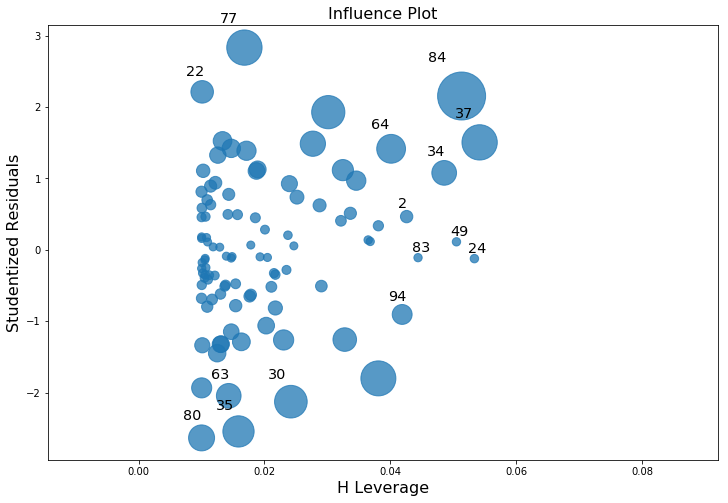

In [30]:
import statsmodels.api as sm

fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(lr, ax=ax, criterion="cooks")
glue("influenceplot_fig",fig,display=False)

```{glue:figure} influenceplot_fig
:figwidth: 550px
:name: "fig:influenceplot"

Residuals versus leverage.  Points that have high leverage and high residuals strongly influence the resulting linear regression.
```

An obvious question to ask next is, if you do have large values of Cook's distance, what should you do? As always, there's no hard and fast rules. Probably the first thing to do is to try running the regression with that point excluded and see what happens to the model performance and to the regression coefficients. If they really are substantially different, it's time to start digging into your data set and your notes that you no doubt were scribbling as your ran your study; try to figure out *why* the point is so different. If you start to become convinced that this one data point is badly distorting your results, you might consider excluding it, but that's less than ideal unless you have a solid explanation for why this particular case is qualitatively different from the others and therefore deserves to be handled separately.^[An alternative is to run a "robust regression"; I'll discuss robust regression in a later version of this book.] To give an example, let's delete the observation from day 64, the observation with the largest Cook's distance for the `mlr` model. We can do this using pandas `drop()` command:

In [32]:
mlr = smf.ols(formula="grump ~ sleep + babysleep", data=parenthood_df.drop([64])).fit()
mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  grump   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     215.9
Date:                Mon, 14 Dec 2020   Prob (F-statistic):           2.96e-36
Time:                        16:44:02   Log-Likelihood:                -284.08
No. Observations:                  99   AIC:                             574.2
Df Residuals:                      96   BIC:                             582.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    126.6611      3.066     41.317      0.000     120.576     132.746
sleep         -9.0747      0.558    -16.272      0.000     -10.182      -7.968
babysleep      0.0240      0.270      0.089      0.929      -0.512       0.560
==============================================================================
Omnibus:                        0.744   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.689   Jarque-Bera (JB):                0.311
Skew:                          -0.035   Prob(JB):                        0.856
Kurtosis:                       3.265   Cond. No.                         77.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As you can see, those regression coefficients have barely changed in comparison to the values we got earlier. In other words, we really don't have any problem as far as anomalous data are concerned.




### Checking the normality of the residuals

Like many of the statistical tools we've discussed in this book, regression models rely on a normality assumption. In this case, we assume that the residuals are normally distributed. Firstly, I firmly believe that it never hurts to draw an old fashioned histogram. The command I use might be something like this:

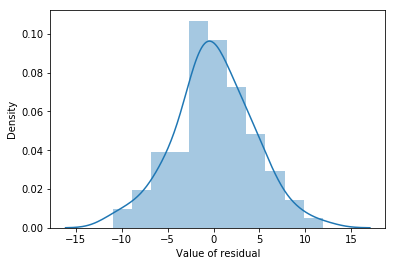

In [33]:
sns.distplot(mlr.resid)
plt.xlabel("Value of residual")
fig=plt.gcf()
glue("residdist_fig",fig,display=False)

```{glue:figure} residdist_fig
:figwidth: 550px
:name: "fig:residdist"

A histogram of the (ordinary) residuals in the `mlr` model. These residuals look very close to being normally distributed, much moreso than is typically seen with real data. This shouldn't surprise you... they aren't real data, and they aren't real residuals!
```

The resulting plot is shown in {numref}`fig:residdist`, and as you can see the plot looks pretty damn close to normal, almost unnaturally so.  There are a variety of others ways of checking normality of residual but we won't go into them now.

### Checking the linearity of the relationship

The third thing we might want to test is the linearity of the relationships between the predictors and the outcomes. There's a few different things that you might want to do in order to check this. Firstly, it never hurts to just plot the relationship between the fitted values $\hat{Y}_i$ and the observed values $Y_i$ for the outcome variable, as illustrated in {numref}`fig:fitobs`.

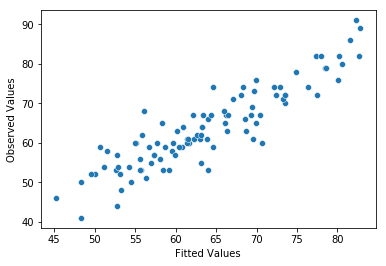

In [34]:
sns.scatterplot(mlr.fittedvalues,parenthood_df.grump)
plt.xlabel("Fitted Values")
plt.ylabel("Observed Values")
fig=plt.gcf()
glue("fitobs_fig",fig,display=False)

```{glue:figure} fitobs_fig
:figwidth: 550px
:name: "fig:fitobs"

Plot of the fitted values against the observed values of the outcome variable. A straight line is what we're hoping to see here. This looks pretty good, suggesting that there's nothing grossly wrong, but there could be hidden subtle issues.
```

One of the reasons I like to draw these plots is that they give you a kind of "big picture view". If this plot looks approximately linear, then we're probably not doing too badly (though that's not to say that there aren't problems). However, if you can see big departures from linearity here, then it strongly suggests that you need to make some changes.

In any case, in order to get a more detailed picture it's often more informative to look at the relationship between the fitted values and the residuals themselves:

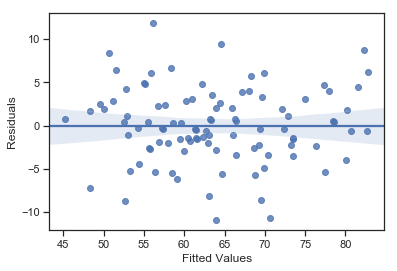

In [190]:
sns.regplot(mlr.fittedvalues,mlr.resid)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
fit=plt.gcf()
glue("fitresid_fig",fig,display=False)

```{glue:figure} fitresid_fig
:figwidth: 550px
:name: "fig:fitresid"

Plot of the fitted values against the residuals for `mlr`, with a line showing the relationship between the two. If this is horizontal and straight, then we can feel reasonably confident that the \"average residual\" for all \"fitted values\" is more or less the same.
```


The output is shown in {numref}`fig:fitresid`. As you can see, not only does it draw the scatterplot showing the fitted value against the residuals, it also plots a line through the data that shows the relationship between the two. Ideally, this should be a straight, perfectly horizontal line. There's some hint of curvature here, but it's not clear whether or not we be concerned. 


### Checking the homogeneity of variance

The regression models that we've talked about all make a homogeneity of variance assumption: the variance of the residuals is assumed to be constant. One useful way to check this is to plot of the square root of the size of the residual $\sqrt{|\epsilon_i|}$, as a function of the fitted value $\hat{Y}_i$. We can produce the plot using the following command,

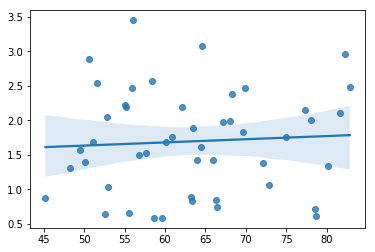

In [35]:
sns.regplot(mlr.fittedvalues, np.sqrt(mlr.resid))
fig=plt.gcf()
glue("fitsqrresid_fig",fig,display=False)

```{glue:figure} fitsqrresid_fig
:figwidth: 550px
:name: "fig:fitsqrresid"

Plot of the fitted values (model predictions) against the square root of the abs standardised residuals. This plot is used to diagnose violations of homogeneity of variance. If the variance is really constant, then the line through the middle should be horizontal and flat.
```


and the resulting plot is shown in {numref}`fig:fitsqrresid`. Note that this plot actually uses the standardised residuals (i.e., converted to $z$ scores) rather than the raw ones, but it's immaterial from our point of view. What we're looking to see here is a straight, horizontal line running through the middle of the plot.

It's a bit beyond the scope of this chapter to talk too much about how to deal with violations of homogeneity of variance, but I'll give you a quick sense of what you need to consider. The *main* thing to worry about, if homogeneity of variance is violated, is that the standard error estimates associated with the regression coefficients are no longer entirely reliable, and so your $t$ tests for the coefficients aren't quite right either. 

### Checking for collinearity

The interpretation of the multiple regression equation depends on the assumption that the predictors are not strongly interrelated.  In particular, in a multiple regression setting we said earlier that we interpet the coefficient as measuring the change in the output variable when one of the predictors is increased, holding all other variables constant.  This may not be a valid interpretation though when the predictors are themselves highly correlated.

When predictors are completely lacking any linear relationship they are known as **orthogonal**.  Although this criterion is almost never met in practice it is usually not enough of a problem to affect most analyses.  However, sometimes the predictors are so highly related that it is impossible to propertly estimate the coefficients.  For example imagine predicting grumpiness given two predictors 'dadsleep' and a *copy* of 'dadsleep'.  The two copies of dadsleep are now high correlated (actually $r=1.0$) and colinear and as a results it doesn't even make sense to talk about the effect of 'dadsleep' controlling for 'the copy of dadsleep'.  There's simply no way to extert that "control" given the data.  This is the most extreme cases but even more subtle forms of correlation and colinearity between predictor variables can cause problems.


The last kind of regression diagnostic that I'm going to discuss in this chapter is the use of **_variance inflation factors_** (VIFs), which are useful for determining whether or not the predictors in your regression model are too highly correlated with each other. There is a variance inflation factor associated with each predictor $X_k$ in the model, and the formula for the $k$-th VIF is:
$
\mbox{VIF}_k = \frac{1}{1-{R^2_{(-k)}}}
$
where $R^2_{(-k)}$ refers to $R$-squared value you would get if you ran a regression using $X_k$ as the outcome variable, and all the other $X$ variables as the predictors. The idea here is that $R^2_{(-k)}$ is a very good measure of the extent to which $X_k$ is correlated with all the other variables in the model. Better yet, the square root of the VIF is pretty interpretable: it tells you how much wider the confidence interval for the corresponding coefficient $b_k$ is, relative to what you would have expected if the predictors are all nice and uncorrelated with one another. 

If you've only got two predictors, the VIF values are always going to be the same, as we can see if we use a few special statsmodel functions:



In [246]:
# get y and X design matricies based on the multiple regression:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
y, X = dmatrices('grump ~ babysleep + sleep', parenthood_df, return_type='dataframe')

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

,VIF Factor,features
0,48.784569,Intercept
1,1.651038,babysleep
2,1.651038,sleep


And since the square root of 1.65 is 1.28, we see that the correlation between our two predictors isn't causing much of a problem. 

To give a sense of how we could end up with a model that has bigger collinearity problems, suppose I were to run a much less interesting regression model, in which I tried to predict the `day` on which the data were collected, as a function of all the other variables in the data set. To see why this would be a bit of a problem, let's have a look at the correlation matrix for all four variables:

In [248]:
parenthood_df.corr()

,sleep,babysleep,grump,day
sleep,1.000000,0.627949,-0.903384,-0.098408
babysleep,0.627949,1.000000,-0.565964,-0.010434
grump,-0.903384,-0.565964,1.000000,0.076479
day,-0.098408,-0.010434,0.076479,1.000000


We have some fairly large correlations between some of our predictor variables (e.g., -0.9 between sleep and grumpiness)! When we run the regression model and look at the VIF values, we see that the collinearity is causing a lot of uncertainty about the coefficients. First, run the regression...



In [259]:
mlr_3 = smf.ols(formula="day ~ babysleep + sleep + grump", data=parenthood_df).fit()
res=mlr_3.summary()
res.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,95.9012,88.294,1.086,0.280,-79.362,271.164
babysleep,1.1881,1.821,0.653,0.516,-2.426,4.802
sleep,-6.0918,7.146,-0.852,0.396,-20.277,8.093
grump,-0.1967,0.682,-0.288,0.774,-1.550,1.157


We can see that the 95% confidence intervals are quite large on everything and none of the coefficients are significant.  Now look at the VIFs:

In [260]:
# get y and X design matricies based on the multiple regression:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
y, X = dmatrices('day ~ babysleep + sleep + grump', parenthood_df, return_type='dataframe')

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

,VIF Factor,features
0,911.755894,Intercept
1,1.651064,babysleep
2,6.102337,sleep
3,5.437903,grump


And the VIF factor is quite large on many of the predictors.  So, yep, that's some mighty fine collinearity you've got there.  Read more about [VIF](https://en.wikipedia.org/wiki/Variance_inflation_factor#Interpretation) on Wikipedia!  VIFs greater than 5 are often considered problematic.

## Model selection

One fairly major problem that remains is the problem of "model selection". That is, if we have a data set that contains several variables, which ones should we include as predictors, and which ones should we not include? In other words, we have a problem of **_variable or feature selection_**. In general, model selection is a complex business, but it's made somewhat simpler if we restrict ourselves to the problem of choosing a subset of the variables that ought to be included in the model. Nevertheless, I'm not going to try covering even this reduced topic in a lot of detail. Instead, I'll talk about two broad principles that you need to think about; and then discuss one concrete tool that python provides to help you select a subset of variables to include in your model. Firstly, the two principles:

- It's nice to have an actual substantive basis for your choices. That is, in a lot of situations you the researcher have good reasons to pick out a smallish number of possible regression models that are of theoretical interest; these models will have a sensible interpretation in the context of your field. Never discount the importance of this. Statistics serves the scientific process, not the other way around. 
- To the extent that your choices rely on statistical inference, there is a trade off between simplicity and goodness of fit. As you add more predictors to the model, you make it more complex; each predictor adds a new free parameter (i.e., a new regression coefficient), and each new parameter increases the model's capacity to "absorb" random variations. So the goodness of fit (e.g., $R^2$) continues to rise as you add more predictors no matter what. If you want your model to be able to generalise well to new observations, you need to avoid throwing in too many variables. 

This latter principle is often referred to as **_Ockham's razor_**, and is often summarised in terms of the following pithy saying: *do not multiply entities beyond necessity*. In this context, it means: don't chuck in a bunch of largely irrelevant predictors just to boost your $R^2$. Hm. Yeah, the original was better. 

In any case, what we need is an actual mathematical criterion that will implement the qualitative principle behind Ockham's razor in the context of selecting a regression model. As it turns out there are several possibilities. The one that I'll talk about is the **_Akaike information criterion_** [AIC; {cite}`Akaike1974`] simply because it's a nice one to use and hard to pronounce.

In the context of a linear regression model (and ignoring terms that don't depend on the model in any way!), the AIC for a model that has $K$ predictor variables plus an intercept is:
$
\mbox{AIC} = \displaystyle\frac{\mbox{SS}_{res}}{\hat{\sigma}}^2+ 2K
$
The smaller the AIC value, the better the model performance is. If we ignore the low level details, it's fairly obvious what the AIC does: on the left we have a term that increases as the model predictions get worse; on the right we have a term that increases as the model complexity increases. The best model is the one that fits the data well (low residuals; left hand side) using as few predictors as possible (low $K$; right hand side). In short, this is a simple implementation of Ockham's razor. 

It turns out that when you do an OLS regression with statsmodels is already computes the AIC for your model:

In [5]:
mlr_4 = smf.ols(formula="grump ~ sleep", data=parenthood_df).fit()
mlr_4.aic

578.9528308961352

### Backward elimination

Okay, so how can we use the AIC to help us find the right structure for our model (i.e., which predictors to keep and which aren't worth it)?  Let's start with the basic **_backward elimination_** approach. According to this approach, we start with the most complete regression model, including all possible predictors. Then, at each "step" we try all possible ways of removing one of the variables, and whichever of these is best (in terms of lowest AIC value) is accepted. This becomes our new regression model; and we then try all possible deletions from the new model, again choosing the option with lowest AIC. This process continues until we end up with a model that has a lower AIC value than any of the other possible models that you could produce by deleting one of its predictors. 

We can combine our knowledge now of statsmodels and ols regression with python to create our own algoritm which should get the job done.  

Let's see this in action. First, I am going to create a function the will perform the regression with an arbitrary set of features:

In [63]:
def eval_aic(response, features, data):
    formula = "{} ~ {}".format(response, ' + '.join(features))
    m = smf.ols(formula=formula, data=parenthood_df).fit()
    return m.aic, m

For instance I can use this to run a regression with grump predicted by sleep and day:

In [66]:
aic, m = eval_aic('grump', ['sleep','day'], parenthood_df)
aic, m

(580.8680837467222,
 <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x12176ec18>)

This returns the AIC score (which we are trying to optimize) and our fitted linear regression model.  Next we will write a function that does the logic of searching for which variable to remove.  For now I won't go into the details of how this code words but provide it here for you to examine:

In [69]:
def eval_aic(response, features, data):
    formula = "{} ~ {}".format(response, ' + '.join(features))
    m = smf.ols(formula=formula, data=parenthood_df).fit()
    return m.aic, m


def backwards_select(dataframe, response):
    remaining = set(dataframe.columns)
    remaining.remove(response)

    # compute the full model
    best_aic_so_far, m = eval_aic(response, remaining, dataframe)

    terminate = False
    while not terminate and len(remaining)!=1:
        result = []
        for candidate in remaining:
            predictors = remaining.difference([candidate])
            aic, m = eval_aic(response, remaining.difference([candidate]), dataframe)
            result.append([aic,predictors])

        result.sort(reverse=True)
        best_new_aic, best_predictors = result.pop()
        if best_new_aic < best_aic_so_far:
            # found a better one
            best_aic_so_far = best_new_aic
            remaining = best_predictors
            # you found a better model so replace remaining
        else:
            terminate = True
            break

    print("The best backwards model is:")
    print("AIC", best_aic_so_far)
    aic, m = eval_aic(response, remaining, dataframe)
    print(m.model.formula)
    print(m.summary())
    return m

We can then use this code to find the best model which minimizes the AIC value by removing features from the full model:

In [70]:
backwards_select(parenthood_df, 'grump')

The best backwards model is:
AIC 578.9528308961352
grump ~ sleep
                            OLS Regression Results                            
Dep. Variable:                  grump   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     434.9
Date:                Thu, 17 Oct 2019   Prob (F-statistic):           8.18e-38
Time:                        00:05:29   Log-Likelihood:                -287.48
No. Observations:                 100   AIC:                             579.0
Df Residuals:                      98   BIC:                             584.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

It ends up the best model is just to predict grumpiness from sleep which isn't all the surprising given that is what we started with at the start of the chapter.

### Forward selection

As an alternative, you can also try **_forward selection_**. This time around we start with the smallest possible model as our start point, and only consider the possible additions to the model.

In [103]:
def eval_aic(response, features, data):
    formula = "{} ~ {}".format(response, ' + '.join(features))
    m = smf.ols(formula=formula, data=parenthood_df).fit()
    return m.aic, m


def forward_select(dataframe, response):
    remaining = set(dataframe.columns)
    remaining.remove(response)

    selected = []
    current_score, best_new_score = float('+inf'), float('+inf')

    terminate = False
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            aic, m = eval_aic(response, selected+[candidate], dataframe)
            scores_with_candidates.append((aic,candidate))

        scores_with_candidates.sort(reverse=True)
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score > best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score

    print("The best forward model is:")
    print("AIC", best_new_score)
    print(selected)
    aic, m = eval_aic(response, selected, dataframe)
    print(m.model.formula)
    print(m.summary())
    return m

In [104]:
forward_select(parenthood_df, 'grump')

The best forward model is:
AIC 580.8680837467222
['sleep']
grump ~ sleep
                            OLS Regression Results                            
Dep. Variable:                  grump   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     434.9
Date:                Thu, 17 Oct 2019   Prob (F-statistic):           8.18e-38
Time:                        00:19:33   Log-Likelihood:                -287.48
No. Observations:                 100   AIC:                             579.0
Df Residuals:                      98   BIC:                             584.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

As you can see, it's found the same model. In general though, forward and backward selection don't always have to end up in the same place.  The forward and backwards algorithms here were adapted from [this link](https://planspace.org/20150423-forward_selection_with_statsmodels/).

### A caveat

Automated variable selection methods are seductive things, especially when they're bundled up in (fairly) simple functions like `step()`. They provide an element of objectivity to your model selection, and that's kind of nice. Unfortunately, they're sometimes used as an excuse for thoughtlessness. No longer do you have to think carefully about which predictors to add to the model and what the theoretical basis for their inclusion might be... everything is solved by the magic of AIC. And if we start throwing around phrases like Ockham's razor, well, it sounds like everything is wrapped up in a nice neat little package that no-one can argue with.

Or, perhaps not. Firstly, there's very little agreement on what counts as an appropriate model selection criterion. When I was taught backward elimination as an undergraduate, we used $F$-tests to do it, because that was the default method used by the software. Above we used AIC, and since this is an introductory text that's the only method I've described, but the AIC is hardly the Word of the Gods of Statistics. It's an approximation, derived under certain assumptions, and it's guaranteed to work only for large samples when those assumptions are met. Alter those assumptions and you get a different criterion, like the BIC for instance. Take a different approach again and you get the NML criterion. Decide that you're a Bayesian and you get model selection based on posterior odds ratios. Then there are a bunch of regression specific tools that I haven't mentioned. And so on. All of these different methods have strengths and weaknesses, and some are easier to calculate than others (AIC is probably the easiest of the lot, which might account for its popularity). Almost all of them produce the same answers when the answer is "obvious" but there's a fair amount of disagreement when the model selection problem becomes hard.

What does this mean in practice? Well, you *could* go and spend several years teaching yourself the theory of model selection, learning all the ins and outs of it; so that you could finally decide on what you personally think the right thing to do is. Speaking as someone who actually did that, I wouldn't recommend it: you'll probably come out the other side even more confused than when you started. A better strategy is to show a bit of common sense... if you're staring at the results of a forward or backwards procedure, and the model that makes sense is close to having the smallest AIC, but is narrowly defeated by a model that doesn't make any sense... trust your instincts. Statistical model selection is an inexact tool, and as I said at the beginning, *interpretability matters*. 

Here is an interesting discussion about the limiations of automated step-wise proceedures for selecting features to include in a model: [stata.com](https://www.stata.com/support/faqs/statistics/stepwise-regression-problems/).

### Comparing two regression models

An alternative to using automated model selection procedures is for the researcher to explicitly select two or more regression models to compare to each other. You can do this in a few different ways, depending on what research question you're trying to answer. Suppose we want to know whether or not the amount of sleep that my son got has any relationship to my grumpiness, over and above what we might expect from the amount of sleep that I got. We also want to make sure that the day on which we took the measurement has no influence on the relationship. That is, we're interested in the relationship between `babysleep` and `grump`, and from that perspective `sleep` and `day` are nuisance variable or **_covariates_** that we want to control for. In this situation, what we would like to know is whether `grump ~ sleep + day + babysleep` (which I'll call Model 1, or `M1`) is a better regression model for these data than `grump ~ sleep + day` (which I'll call Model 0, or `M0`). There are two different ways we can compare these two models, one based on a model selection criterion like AIC, and the other based on an explicit hypothesis test. I'll show you the AIC based approach first because it's simpler, and follows naturally from what we saw in the last section. The first thing I need to do is actually run the regressions:

In [36]:
M0 = smf.ols(formula="grump ~ sleep + day", data=parenthood_df).fit()
M1 = smf.ols(formula="grump ~ sleep + day + babysleep", data=parenthood_df).fit()

if M0.aic > M1.aic:
    print("Model 1 prefered")
elif M0.aic < M1.aic:
    print("Model 0 preferred")
else:
    print("Both models equally good")
print(M0.aic, M1.aic)

Model 0 preferred
580.8680837467222 582.864617028592


Now that I have my regression models, I could use the `summary()` function to run various hypothesis tests and other useful statistics, just as we have discussed throughout this chapter. However, since the current focus on model comparison, I'll skip this step and go straight to the AIC calculations. Conveniently, the `.aic` variable lets you just spit out the AIC values for each of them.

Since Model 0 has the smaller AIC value, it is judged to be the better model for these data. 

[^ftest]: It's worth noting in passing that this same $F$ statistic can be used to test a much broader range of hypotheses than those that I'm mentioning here. Very briefly: notice that the nested model M0 corresponds to the full model M1 when we constrain some of the regression coefficients to zero. It is sometimes useful to construct submodels by placing other kinds of constraints on the regression coefficients. For instance, maybe two different coefficients might have to sum to zero, or something like that. You can construct hypothesis tests for those kind of constraints too, but it is somewhat more complicated and the sampling distribution for $F$ can end up being something known as the non-central $F$ distribution, which is waaaaay beyond the scope of this book! All I want to do is alert you to this possibility.

A somewhat different approach to the problem comes out of the hypothesis testing framework. Suppose you have two regression models, where one of them (Model 0) contains a *subset* of the predictors from the other one (Model 1). That is, Model 1 contains all of the predictors included in Model 0, plus one or more additional predictors. When this happens we say that Model 0 is **_nested_** within Model 1, or possibly that Model 0 is a **_submodel_** of Model 1. Regardless of the terminology what this means is that we can think of Model 0 as a null hypothesis and Model 1 as an alternative hypothesis. And in fact we can construct an $F$ test for this in a fairly straightforward fashion. We can fit both models to the data and obtain a residual sum of squares for both models. I'll denote these as SS$_{res}^{(0)}$ and SS$_{res}^{(1)}$ respectively. The superscripting here just indicates which model we're talking about.  Then our $F$ statistic is
$
F = \frac{(\mbox{SS}_{res}^{(0)} - \mbox{SS}_{res}^{(1)})/k}{(\mbox{SS}_{res}^{(1)})/(N-p-1)}
$
where $N$ is the number of observations, $p$ is the number of predictors in the full model (not including the intercept), and $k$ is the difference in the number of parameters between the two models.[^ftest]

The degrees of freedom here are $k$ and $N-p-1$. Note that it's often more convenient to think about the difference between those two SS values as a sum of squares in its own right. That is: 
$
\mbox{SS}_\Delta = \mbox{SS}_{res}^{(0)} - \mbox{SS}_{res}^{(1)}
$
The reason why this his helpful is that we can express $\mbox{SS}_\Delta$ a measure of the extent to which the two models make different predictions about the the outcome variable. Specifically:
$
\mbox{SS}_\Delta  = \sum_{i} \left( \hat{y}_i^{(1)} - \hat{y}_i^{(0)} \right)^2
$
where $\hat{y}_i^{(0)}$ is the fitted value for $y_i$ according to model $M_0$ and  $\hat{y}_i^{(1)}$ is the is the fitted value for $y_i$ according to model $M_1$. 

Okay, so that's the hypothesis test that we use to compare two regression models to one another. Now, how do we do it in R? The answer is to use the `anova()` function. All we have to do is input the two models that we want to compare (null model first):


In [37]:
import statsmodels.stats.anova as smanova
print(smanova.anova_lm( M0, M1 ))

   df_resid          ssr  df_diff   ss_diff         F    Pr(>F)
0      97.0  1837.155916      0.0       NaN       NaN       NaN
1      96.0  1837.092228      1.0  0.063688  0.003328  0.954116


Statsmodel has used the acronym `ssr` to refer to the residual sum of squares from each model. That is, `ssr` in this output corresponds to SS$_{res}$ in the formula above.  Since we have $p>.05$ (*way* great) we retain the null hypothesis (`M0`).  This approach to regression, in which we add all of our covariates into a null model, and then *add* the variables of interest into an alternative model, and then compare the two models in hypothesis testing framework, is often referred to as **_hierarchical regression_**.

## Summary

Ok, we've come a long way and covered a lot of the details about regression, perhaps more than you will need for the labs but hopefully something you can come back and refer to sometime in the future.

We covered: 
- Basic ideas in linear regression and how regression models are estimated.
- Multiple linear regression.
- Measuring the overall performance of a regression model using $R^2$
- Hypothesis tests for regression models
- Calculating confidence intervals for regression coefficients, and standardised coefficients 
- The assumptions of regression and how to check them 
- Selecting a regression model (aka variable selection)

## References

```{bibliography} ../../references.bib
:filter: docname in docnames
```